## A hand shake to the equations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xlrd
from scipy import stats

Simple SIR model:

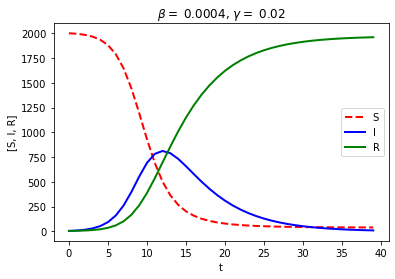

In [2]:
#Differential equation
def f(k,t):
    eta = 0.0004
    gamma = 0.2
    S = k[0]
    I = k[1]
    R = k[2]
    dSdt = -1*eta*I*S
    dIdt = eta*I*S - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]

#Initial conditions and t range
t = np.arange(0,40)
k0=[2000,5, 5]

#Solve
k = odeint(f,k0,t)

#Plot name 
eta = 0.0004
gamma = 0.02

#Plotting
plt.plot(t,k[:,0],'r--', linewidth=2.0)
plt.plot(t,k[:,1],'b-', linewidth=2.0)
plt.plot(t,k[:,2],'g-', linewidth=2.0)

#print(k[20, 0])
plt.title('$\u03B2 =$ {}, $\gamma =$ {}'.format(eta, gamma))
plt.xlabel("t")
plt.ylabel("[S, I, R]")
plt.legend(["S","I", "R"])
plt.show()

Divied population with varios $\beta$ differentiation:

In [3]:
gamma = 1/14
delta = 1
betam = 7/14

def equations(k,t):
    betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

    ST, IT, RT = k[0], k[1], k[2]
    SM, IM, RM = k[3], k[4], k[5]
    SL, IL, RL = k[6], k[7], k[8]
    I = IT + IM + IL
    S = ST + SM + SL
    #top
    dSTdt = -1*betat*I*ST
    dITdt = betat*I*ST - gamma*IT
    dRTdt = gamma*IT
    #medium
    dSMdt = -1*betam*I*SM
    dIMdt = betam*I*SM - gamma*IM
    dRMdt = gamma*IM
    #low
    dSLdt = -1*betal*I*SL
    dILdt = betal*I*SL - gamma*IL
    dRLdt = gamma*IL
    
    return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]

In [4]:
#Initial conditions and t range
t  =  np.arange(0,55, 0.01)

k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]

In [5]:
#Solve
k = odeint(equations,k0,t)

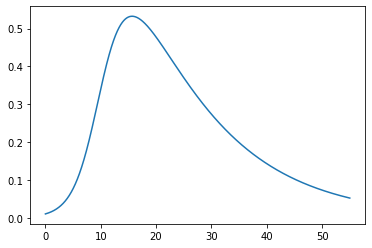

In [6]:
plt.plot(t, k[:,1]+k[:,4]+k[:,7])

1.0
(5500, 9)


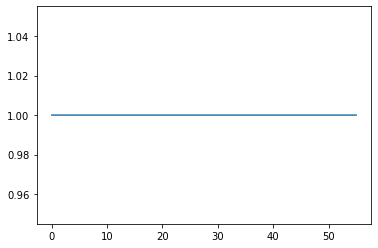

In [7]:
print(np.sum(k[0, :]))
print(np.shape(k))

plt.plot(t, np.sum(k, axis = 1))

In [8]:
pop = k[:, 1::3].sum(1)
Itot = k[:,1]+k[:,4]+k[:,7]
pop == Itot

array([ True,  True,  True, ...,  True,  True,  True])

Text(0.5, 0, '$t$')

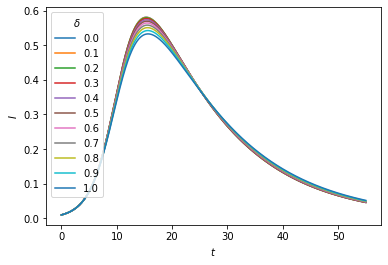

In [9]:
Imax = []
delta_range = np.arange(0, 1.1, 0.1)
t_p = []
for delta in delta_range:
    k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]
    k = odeint(equations,k0,t)
    Itot = k[:, 1::3].sum(1)
    Imax.append(max(Itot))
    t_p.append(np.where(Itot == max(Itot))[0][0])
    plt.plot(t, Itot, label = f'{round(delta, 1)}')
    
plt.legend(title = '$\delta$')
plt.ylabel("$I$")
plt.xlabel("$t$")

Text(0.5, 0, '$I_{max}$')

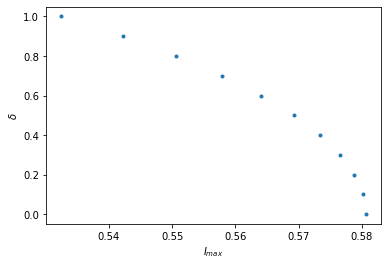

In [10]:
plt.plot(Imax, delta_range, '.')

plt.ylabel('$\delta$')
plt.xlabel('$I_{max}$')

[1532, 1532, 1533, 1536, 1538, 1542, 1546, 1551, 1556, 1561, 1566]


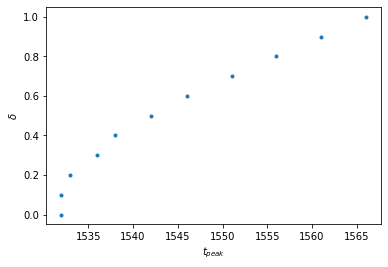

In [11]:
plt.plot(t_p, delta_range, '.')

plt.ylabel('$\delta$')
plt.xlabel('$t_{peak}$')
print(t_p)

for $\Delta N$:
\begin{align}
NT = NM \epsilon\\
NL = NM (4\epsilon)\\
NM + NT + NL = 1\\
NM = \frac{1}{1+5\epsilon}
\end{align}

No handles with labels found to put in legend.


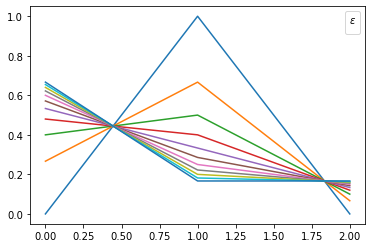

In [16]:
delta = 1.5
eps_range = np.arange(0, 1.1, 0.1)
Imax = []
t_p = []

t  =  np.arange(0,55, 0.01)

for epsilon in eps_range:
    M = 1/ (1 + 5 * epsilon)
    T, L = M * epsilon, 4 * M * epsilon
#     print(L, M, T, (L+T+M), '\n')
    plt.plot([L, M, T])
    k0 = [T, 0, 0, M, 0.01, 0, L, 0, 0]
    k = odeint(equations,k0,t)
    Itot = k[:, 1::3].sum(1)
    Imax.append(max(Itot))
    t_p.append(np.where(Itot == max(Itot))[0][0])
#     plt.plot(t, Itot, label = f'{round(epsilon, 1)}')
    
plt.legend(title = '$\epsilon$')
# plt.ylabel("$I$")
# plt.xlabel("$t$")

1.01
(5500, 9)


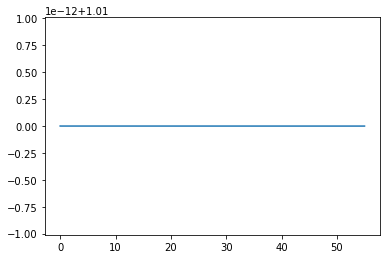

In [17]:
print(np.sum(k[0, :]))
print(np.shape(k))

plt.plot(t, np.sum(k, axis = 1))

Text(0.5, 0, '$t$')

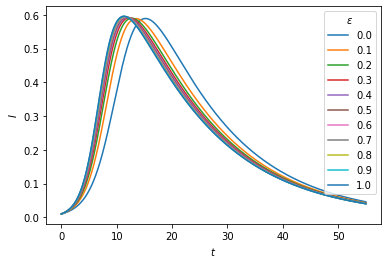

In [13]:
delta = 1.5
eps_range = np.arange(0, 1.1, 0.1)
Imax = []
t_p = []

t  =  np.arange(0,55, 0.01)

for epsilon in eps_range:
    M = 1/ (1 + 5 * epsilon)
    T, L = M * epsilon, 4 * M * epsilon
#     print(L, M, T, (L+T+M), '\n')
#     plt.plot([L, M, T])
    k0 = [T, 0, 0, M, 0.01, 0, L, 0, 0]
    k = odeint(equations,k0,t)
    Itot = k[:, 1::3].sum(1)
    Imax.append(max(Itot))
    t_p.append(np.where(Itot == max(Itot))[0][0])
    plt.plot(t, Itot, label = f'{round(epsilon, 1)}')
    
plt.legend(title = '$\epsilon$')
plt.ylabel("$I$")
plt.xlabel("$t$")

Text(0.5, 0, '$\\epsilon$')

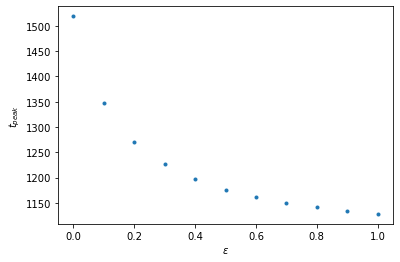

In [97]:
plt.plot(eps_range, t_p, '.')
plt.ylabel('$t_{peak}$')
plt.xlabel('$\epsilon$')

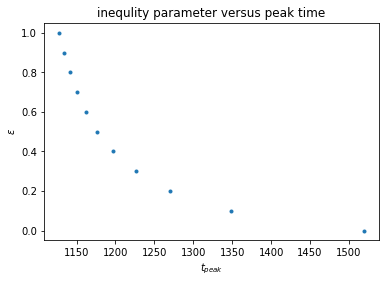

In [14]:
plt.plot(t_p, eps_range, '.')
plt.xlabel('$t_{peak}$')
plt.ylabel('$\epsilon$')
plt.title('inequlity parameter versus peak time')
plt.savefig('epstpeak.png')

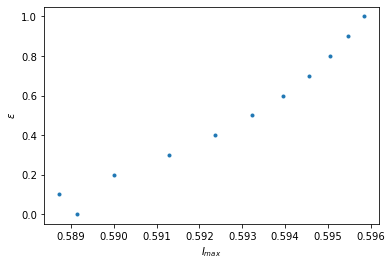

In [15]:
plt.plot(Imax, eps_range, '.')
plt.xlabel('$I_{max}$')
plt.ylabel('$\epsilon$')
plt.savefig('epsImax.png')

## Gini Coefficient
Gini Coefficient calculation for $\epsilon$:

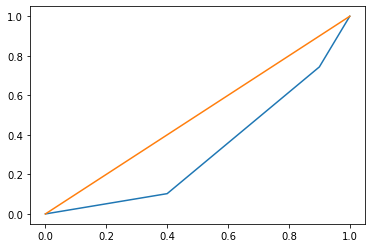

In [18]:
epsilon = 0.2
AL, AM, AT = 1, 5, 10 #Assets of each group

# M = 1 / (3 - 2 * epsilon)
# T, L = M * (1 - epsilon), M * (1 - epsilon)

M = 1/ (1 + 5 * epsilon)
T, L = M * epsilon, 4 * M * epsilon


# print(np.sum(M+L+T))
points = np.zeros((4, 2))
points[1] = [L, (AL*L) / (AL*L + AM*M + AT*T)]
points[2] = [L + M, (AL*L + AM*M) / (AL*L + AM*M + AT*T)]
points[3] = [1, 1]

# print(points)
plt.plot(points[:, 0], points[:, 1])
plt.plot([0, 1], [0, 1])



[0.0, 0.06406250000000005, 0.0903846153846154, 0.1036956521739131, 0.11132075471698114, 0.11607142857142852, 0.11921641791044782, 0.12139639639639635, 0.122962962962963, 0.12412190082644628, 0.12499999999999997]


Text(0.5, 0, '$\\epsilon$')

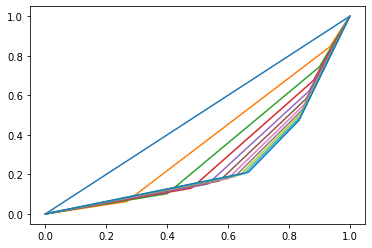

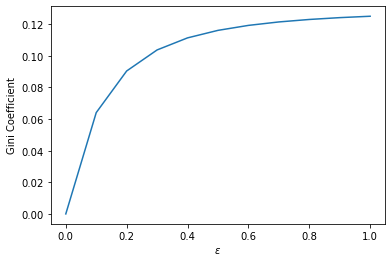

In [20]:
from shapely.geometry import Polygon

AL, AM, AT = 1, 5, 10 #Assets of each group 
gini = []
eps_range = np.arange(0, 1.1, 0.1)

for epsilon in eps_range:
#     M = 1 / (3 - 2 * epsilon) # (1 + 2 * epsilon) / 3
#     T, L = M * (1 - epsilon), M * (1 - epsilon)
    M = 1/ (1 + 5 * epsilon)
    T, L = M * epsilon, 4 * M * epsilon


    points = np.zeros((4, 2))
    points[1] = [L, (AL*L) / (AL*L + AM*M + AT*T)]
    points[2] = [L + M, (AL*L + AM*M) / (AL*L + AM*M + AT*T)]
    points[3] = [1, 1]

#     plt.figure()
    plt.plot(points[:, 0], points[:, 1])
#     print(points[:, 0], points[:, 1])
#     plt.title(f"{points}")

    pgon = Polygon(points)
    gini.append((pgon.area / 2))
    
#     print(points)
    
# plt.plot([0, 1], [0, 1])
print(gini)

plt.figure()
plt.plot(eps_range, gini)
plt.ylabel("Gini Coefficient")
plt.xlabel("$\epsilon$")


Text(0.5, 0, 'Gini')

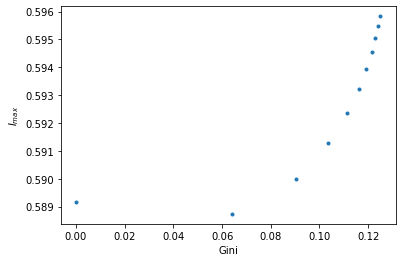

In [21]:
plt.plot(gini, Imax, '.')
plt.ylabel('$I_{max}$')
plt.xlabel('Gini')

Text(0.5, 0, 'Gini')

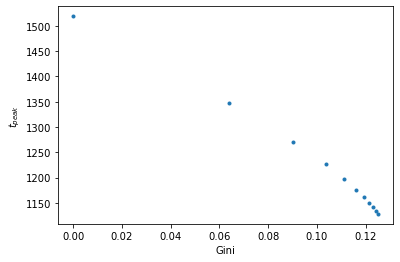

In [22]:
plt.plot(gini, t_p, '.')
plt.ylabel('$t_{peak}$')
plt.xlabel('Gini')